[<h1> FIT5197 Assignment 3 Semester 2, 2020 </h1>](https://lms.monash.edu/mod/assign/view.php?id=7560449)

---
Authors: Dan Nguyen, Yun Zhao

Admins (Competition): Dr. Levin Kuhlmann, Yun Zhao, Anil Gurbuz

Proofreaders: Dr. Levin Kuhlmann, Yun Zhao, and other tutors 

Date: Oct 2020

---

[<h1> Assignment Instruction </h1>](https://lms.monash.edu/mod/assign/view.php?id=7560449)

<span style="color:red"> Please read through the instructions carefully, by submitting the assignment, you are considered to have read all the instructions carefully and be aware of the penalties that entail. </span>

<h1>Part 1: Regression (50 Marks)</h1>

This part is about regression. Specifically, you will be ``predicting the fuel efficiency`` of a car (in kilometers per litre) based on its characteristics. This is a practical problem as Australia is one of the largest automobile markets in the world; thus, correctly predicting the fuel efficiency is necessary to control emission rates to the environment.

The dataset has many observations and predictors obtained from many retailers for car models available for sale from 2017 to 2020. The target variable is the fuel efficiency of the car measured in kilometers per litre. The higher this value, the better the fuel efficiency of the car. 

PleaseProvide working/R code/justifications for each of these questions as required.

$\textbf{Note:}$ If not explicitly mentioned, libraries are not allowed

In [8]:
# Read the data from students' side
remove(list = ls())
train <- read.csv("RegressionTrain.csv")
test <- read.csv("RegressionTest.csv")

In [ ]:
# PLEASE DO NOT ALTER THIS CODE BLOCK
# Please skip (don't run) this if you are a student
# Read in the data from marking tutors' side (ensure no cheating!)
remove(list = ls())
train <- read.csv("../data/RegressionTrain.csv")
test <- read.csv("../data/RegressionTest.csv")
label <- read.csv("../data/RegressionTestLabel.csv")

<h2> Question 1 (5 Marks) </h2>

Fit a $\textbf{multiple linear model}$ to the fuel efficiency data using the ``train`` dataset. By checking the summary information, which predictors/variables do you think are possibly associated with fuel efficiency (use ``0.05`` significant level), and why? Which ``three predictors/variables`` appear to be the strongest predictors of fuel efficiency, and why? 

$\textbf{Note}$: You don't have to worry about categorical variables here since R can deal with this automatically, focus your efforts on interpretation. Additionally, when explaining why features are strongly associated with the target, please refrain giving one or two sentences answers, these answers are not descriptive enough and will result in deduction of marks. Finally, please name the model here ``lm.fit`` for future marking purposes.

In [9]:
# mutlivariate linear regression model 
lm.fit <- lm(Comb.FE ~ .,data=train)
summary(lm.fit)


Call:
lm(formula = Comb.FE ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0256 -0.9978 -0.0644  0.7006 11.3941 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.783e+02  8.587e+01  -2.076  0.03809 *  
Model.Year                9.640e-02  4.255e-02   2.266  0.02363 *  
Eng.Displacement         -1.364e+00  1.025e-01 -13.306  < 2e-16 ***
No.Cylinders              4.644e-02  6.769e-02   0.686  0.49282    
AspirationOT             -3.452e-01  6.352e-01  -0.543  0.58693    
AspirationSC             -9.197e-01  2.282e-01  -4.031 5.85e-05 ***
AspirationTC             -1.303e+00  1.288e-01 -10.111  < 2e-16 ***
AspirationTS             -1.149e+00  4.945e-01  -2.323  0.02035 *  
No.Gears                 -1.307e-01  2.995e-02  -4.364 1.37e-05 ***
Lockup.Torque.ConverterY -8.243e-01  1.117e-01  -7.377 2.78e-13 ***
Drive.SysA               -8.339e-02  1.521e-01  -0.548  0.58356    
Drive.SysF                1.

In [10]:
TopPredictor.lm <- function(model){
    # Finding the best predictors/variables for fuel efficiency
    Predictor <- coef(summary(model))
    # Filtering only predictors/variables with significance of 0.05
    Best.Pred <- Predictor[Predictor[,"Pr(>|t|)"]<0.05,]
    Predictor <- sort(Best.Pred[,4],decreasing=FALSE)
    print(Predictor[1])
    print(Predictor[2])
    print(Predictor[3])
    }

TopPredictor(lm.fit)

ERROR: Error in TopPredictor(lm.fit): could not find function "TopPredictor"


__<span style="color:blue">SOLUTION 1:</span>__ 

__<span style="color:blue">Predictor/variables (significance level of 0.05 or less) that have possibly associated with fuel efficiency are:- </span>__

1. Model.Year           &nbsp;        ``Significance: 0.05``
2. Eng.Displacement     &nbsp;        ``Significance: 0.0``
3. AspirationSC         &nbsp;        ``Significance: 0.0``
4. AspirationTC         &nbsp;        ``Significance: 0.0``
5. AspirationTS         &nbsp;        ``Significance: 0.0``
6. No.Gears             &nbsp;        ``Significance: 0.0``
7. Lockup.Torque.ConverterY   &nbsp;  ``Significance: 0.0``
8. Drive.SysF                &nbsp;   ``Significance: 0.0``
9. Max.Ethanol                &nbsp;  ``Significance: 0.05``
10. Fuel.TypeGP               &nbsp;  ``Significance: 0.0``

Above variables have $\textbf{Pr(>|t|)}$ less than or equal to 0.05 when applied Linear model function. 

__<span style="color:blue">Predictor/variables with strongest associated with fuel efficiency are:- </span>__

1. Eng.Displacement :    &nbsp;        $\textbf{Pr(>|t|)} ---->$ less than 2e-16
2. AspirationSC     :    &nbsp;        $\textbf{Pr(>|t|)} ------>$ less than 2e-16
3. Drive.SysF       :    &nbsp;   $\textbf{Pr(>|t|)} ------->$ less than 2e-16

These are the most significant and have the least $\textbf{Pr(>|t|)}$ value when we apply linear modelling.

<h2> Question 2 (5 Marks) </h2>

Describe/discuss the effect that the year of manufacture ``(Model.Year)`` variable appears to have on the mean ``fuel efficiency``. Additionally, describe/discuss the effect that the number of gears ``(No.Gears)`` variable has on the mean ``fuel efficiency`` of the car.

$\textbf{Note}$: This asks for your descriptions, please refrain from using one or two lines to describe/discuss the effect. Keep answers to be 4 decimal places

__<span style="color:blue">SOLUTION 2:</span>__ 

__<span style="color:blue">Model.Year versus mean fuel efficiency</span>__

From below graph we can conclude that model year don't have any significant effect on fuel efficiency

__<span style="color:blue">Numbers of Gears versus mean fuel efficiency</span>__

From below graph we can conclude that Numbers of Gears does have significant effect on fuel efficiency. As No. of gears increases Fuel efficiency of mean car decreases significantly. Although not perfect an linear equation can be generated that might show graphs behaviour  

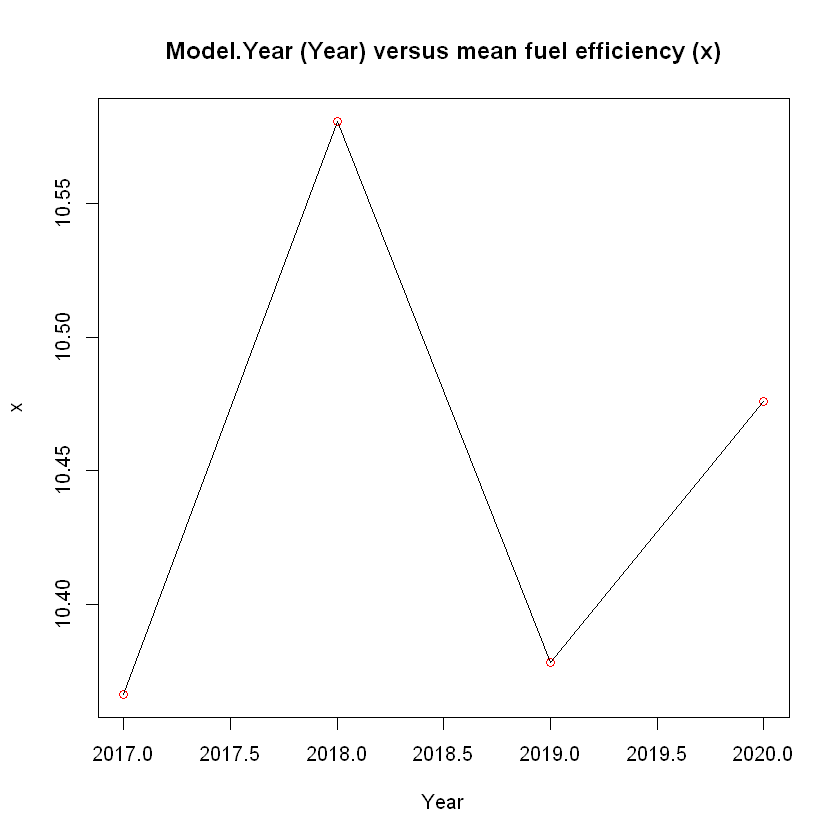

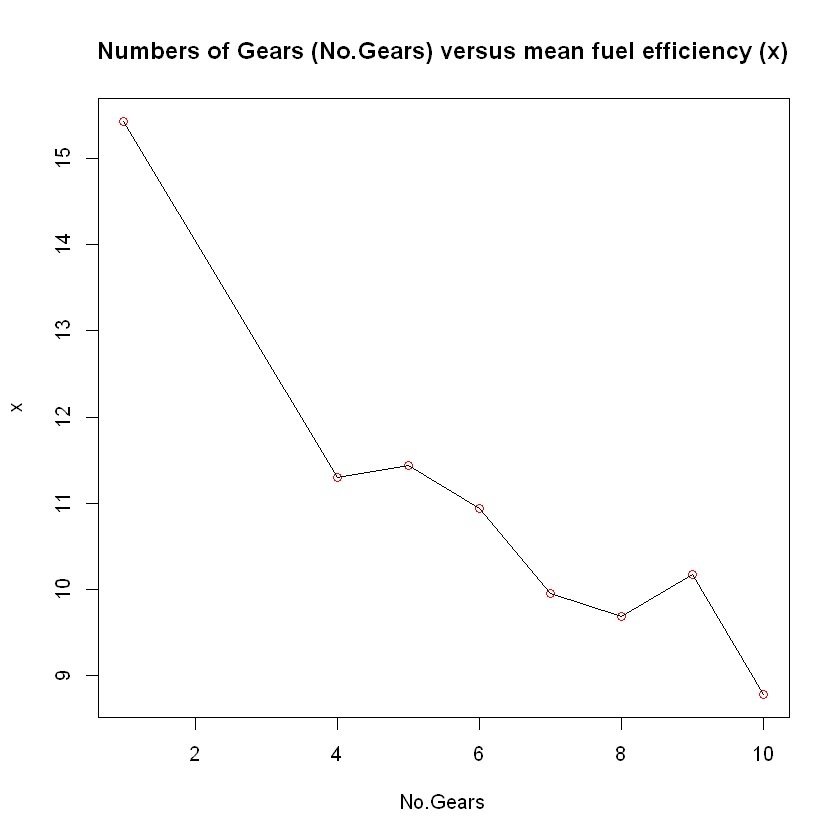

In [11]:
# grouping and finding the mean of data
df1 <- aggregate(x = train$Comb.FE,by=list(Year=train$Model.Year),FUN=mean)
df2 <- aggregate(x = train$Comb.FE,by=list(No.Gears=train$No.Gears),FUN=mean)

# Plotting graph
plot(df1,col  = "red",main = "Model.Year (Year) versus mean fuel efficiency (x)")
lines((df1))
plot(df2,col  = "red",main = "Numbers of Gears (No.Gears) versus mean fuel efficiency (x)")
lines((df2))

<h2> Question 3 (5 Marks) </h2>

Apply the stepwise selection procedure with the $\textbf{BIC}$ penalty to prune out potentially less significant variables. Write down the final regression equation obtained after pruning, please keep the values of the parameter coefficients to 2 decimal places. Finally, also describe the pruned model.

$\textbf{Note}$: please don't change the default direction ``both`` in the step function, this is so that we can check your work easily. Additionally, please name this model ``sw.fit``

$\textbf{YOUR ANSWER HERE}$

In [12]:
# mutlivariate linear regression model with pruning done using BIC penalty
sw.fit <- step(lm.fit,k = log(nrow(train)), direction="both")
summary(sw.fit)

Start:  AIC=1424.68
Comb.FE ~ Model.Year + Eng.Displacement + No.Cylinders + Aspiration + 
    No.Gears + Lockup.Torque.Converter + Drive.Sys + Max.Ethanol + 
    Fuel.Type

                          Df Sum of Sq    RSS    AIC
- Fuel.Type                3     27.87 3556.7 1414.0
- No.Cylinders             1      1.20 3530.0 1417.9
- Model.Year               1     13.11 3541.9 1422.6
- Max.Ethanol              1     14.52 3543.3 1423.2
<none>                                 3528.8 1424.7
- No.Gears                 1     48.63 3577.4 1436.6
- Lockup.Torque.Converter  1    138.97 3667.8 1471.5
- Aspiration               4    267.94 3796.7 1498.2
- Drive.Sys                4    393.01 3921.8 1543.5
- Eng.Displacement         1    452.08 3980.9 1586.2

Step:  AIC=1413.96
Comb.FE ~ Model.Year + Eng.Displacement + No.Cylinders + Aspiration + 
    No.Gears + Lockup.Torque.Converter + Drive.Sys + Max.Ethanol

                          Df Sum of Sq    RSS    AIC
- No.Cylinders             1     


Call:
lm(formula = Comb.FE ~ Eng.Displacement + Aspiration + No.Gears + 
    Lockup.Torque.Converter + Drive.Sys + Max.Ethanol, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0743 -0.9760 -0.0349  0.6566 11.3971 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              16.196874   0.282901  57.253  < 2e-16 ***
Eng.Displacement         -1.277173   0.043418 -29.416  < 2e-16 ***
AspirationOT             -0.100081   0.626276  -0.160 0.873060    
AspirationSC             -0.699137   0.213768  -3.271 0.001100 ** 
AspirationTC             -1.144227   0.107302 -10.664  < 2e-16 ***
AspirationTS             -1.122104   0.481471  -2.331 0.019919 *  
No.Gears                 -0.113537   0.029183  -3.891 0.000105 ***
Lockup.Torque.ConverterY -0.825285   0.110202  -7.489 1.23e-13 ***
Drive.SysA                0.035013   0.145617   0.240 0.810020    
Drive.SysF                1.480191   0.166847   8.872  < 2e-16 ***
Drive.SysP 

__<span style="color:blue">SOLUTION 3:</span>__ 

BIC penalty can help Prune variables which doesn't impact fuel efficency significantly. Model add or remove variables to give the equation with minimum AIC.

<span style="color:blue">Step 1:</span> ``AIC=1424.68`` 

Comb.FE ~ Model.Year + Eng.Displacement + No.Cylinders + Aspiration + No.Gears + Lockup.Torque.Converter + Drive.Sys + Max.Ethanol + Fuel.Type

<span style="color:blue">Step 2:</span> ``AIC=1413.96`` 

Comb.FE ~ Model.Year + Eng.Displacement + No.Cylinders + Aspiration + No.Gears + Lockup.Torque.Converter + Drive.Sys + Max.Ethanol

<span style="color:blue">Step 3:</span> ``AIC=1407.38`` 

Comb.FE ~ Model.Year + Eng.Displacement + Aspiration + No.Gears + Lockup.Torque.Converter + Drive.Sys + Max.Ethanol 

<span style="color:blue">Step 4:</span> ``AIC=1405.54`` 

Comb.FE ~ Eng.Displacement + Aspiration + No.Gears + Lockup.Torque.Converter + Drive.Sys + Max.Ethanol


<span style="color:blue">FORMULA:</span>
<b>Comb.FE = 16.2 - 1.28*Eng.displacement - 0.1*AspirationOT - 0.7*AspirationSC -1.14*AspiratioTC - 1.12*AspirationTS - 0.11*No.Gears -0.83*Lockup.Torque.Converter + 0.04*Drive.SysA + 1.48*Drive.SysF -0.32*Drive.SysP + 0.09* Drive.SysR - 0.01*Max.Ethanol<b>

<h2> Question 4 (5 Marks) </h2>

Say we are going to buy a new car and we want to improve the fuel efficiency of our new car, what does this ``BIC model`` suggest we should do? Provide a detailed answers of at least ``150 words``.

__<span style="color:blue">SOLUTION 4:</span>__ 

From the data formula mentioned above we get some sort of picture about an mathermatical model than can be used to figure out dependence of fuel efficiency on independent variable such as Engine displacement, Aspiration, Number of Gears ,Lockup Torque Converter , Drive System and Maximum Ethanol. These independent varaibles are selected by BIC model because there combination leads to lowest Akaike information criterion, i.e. AIC . Decreasing the values with negative coefficent such as Eng.displacement (coeff = -1.28) and increasing values with positive coefficent such as Drive.SysF (coeff = 1.48) is necceasry to improve the Fuel efficiency of our new car

<h2> Question 5 (5 Marks)</h2>

Imagine that you are looking for a new car to buy to replace your existing car. Use the $\textbf{test}$ dataset to inspect the first car fuel efficiency and see whether it is a good fit for you or not.
    
    (a) Use your BIC model to predict the mean fuel efficiency for this new car. Provide a 95% confidence interval for this prediction. [2 mark]
    (b) Following the previous estimation, given that the current car that you own has a mean fuel efficiency of 9.5 km/l (measured over the life time of your ownership), does your model (BIC) suggest that the new car will have better fuel efficiency than your current car? Why? [3 marks]

In [13]:
# fuel efficiency prediction with 95% confidence interval
test$Comb.FE = predict(sw.fit,test,level=0.95, interval='confidence')
print(test$Comb.FE[1,])

     fit      lwr      upr 
9.287257 9.052956 9.521557 


__<span style="color:blue">SOLUTION 5:</span>__ 

1. Using BIC (95% confidence interval) car's mean F.E. value is 9.287 , lower F.E. value is 9.053 and upper F.E. value 9.521

2. As the value is very close to mean fuel efficiency of 9.5 km/l therefore it's not wise to buy current car

<h2> Question 6 (Libraries are allowed) (25 Marks) </h2>

As a Data Scientist, one of the key tasks is to build models $\textbf{most appropriate/closest}$ to the truth; thus, modelling will not be limitted to these steps in the assignment. To simulate for a realistic modelling process, this question will be in the form of a competition among students to find out who has the best model.

Thus, You will be graded by the performance of your model compared to your classmates', the better your model, the higher your score. Additionally, you need to write a short paragraph describing/documenting your thought process in this model building process ``(300 words)``. Note that this is to explain to us why you build your current model so that we can verify that you understand the model you build and not just copy from other people.

$\textbf{Note}$ Please make sure that we can install the libraries that you use in this part, the code structure can be:

``install.packages("some package", repos='http://cran.us.r-project.org')``

``library("some package")``

Remember that if we cannot run your code, we will have to give you 0 marks, our suggestion is for you to use the standard ``R version 3.6.1``

You also need to name your final model ``fin.mod`` so we can run a check to find out your performance. A good test for your understanding would be to set the previous $\textbf{BIC model}$ to be the final model to check if your code works Appropriately.

$20$ Marks for the model performance in the competition

$5$ Marks for logically writing down the thought process in building the final model

This is the [link](https://www.kaggle.com/t/0a3c0fc91b074816a6315bb4e9b42602) to the competition

__<span style="color:blue">SOLUTION 6:</span>__ 

After pruning the data using BIC criterion, the R square value has observed to be 0.65. Hence, to improve the accuracy (RMSE score) first we need to 
1. transform the independent variables 
2. Find Optimum Regression model.

ggpairs was used to observe the trend of fuel efficiency w.r.t other independent variables. To make an optimum final regression equation an combination of logs and polynomials of independent variables were used.
After carefully observing the trend of fuel efficiency w.r.t other independent variables, 

Further randomForest modelling were used as final model as in comparision with other models tried, RandomForest resulted in better score when checked for output on kaggle. After that hyper parameter optimization were neccesary to extract best RMSE score.

After multiple experiments combination of parameters were found which result in best score so far.

In [ ]:
# Library used
# install.packages("randomForestSRC")
# install.packages("GGally")
options(warn=0)
library(randomForestSRC)
library(GGally)

# An correlation graph to make sense of data variables as well as any relation that can effect train-label
data(train, package = "reshape")
ggpairs(
  train[, c(2, 3, 4, 5, 8, 10)],
  upper = list(continuous = "density", combo = "box_no_facet"),
  lower = list(continuous = "points", combo = "dot_no_facet")
)

# Creating extra variables that might represent fuel efficiency 
train$log.Eng.Displacement = log(train$Eng.Displacement)
train$log.Gear = log(train$No.Gears)
train$log.Max.Ethanol = log(train$Max.Ethanol)
train$log.No.Cylinders = log(train$No.Cylinders)

train$SQRT.Eng = sqrt(train$Eng.Displacement)
train$SQRT.Gear = sqrt(train$No.Gears)
train$SQRT.Max.Ethanol = sqrt(train$Max.Ethanol)
train$SQRT.No.Cylinders = sqrt(train$No.Cylinders)

train$Sq.Eng = (train$Eng.Displacement)^2
train$Sq.Gear = (train$No.Gears)^2
train$Sq.Max.Ethanol = (train$Max.Ethanol)^2
train$Sq.No.Cylinders = (train$No.Cylinders)^2

train$log2.Ethanol <- log(log(log(train$Max.Ethanol)))
train$Combination <- train$log.Eng.Displacement * train$Sq.Max.Ethanol *train$Sq.Gear *train$Sq.No.Cylinders

# For predicting the test label, new variables were introduced in test data
test$log.Eng.Displacement = log(test$Eng.Displacement)
test$log.Gear = log(test$No.Gears)
test$log.Max.Ethanol = log(test$Max.Ethanol)
test$log.No.Cylinders = log(test$No.Cylinders)

test$SQRT.Eng = sqrt(test$Eng.Displacement)
test$SQRT.Gear = sqrt(test$No.Gears)
test$SQRT.Max.Ethanol = sqrt(test$Max.Ethanol)
test$SQRT.No.Cylinders = sqrt(test$No.Cylinders)

test$Sq.Eng = (test$Eng.Displacement)^2
test$Sq.Gear = (test$No.Gears)^2
test$Sq.Max.Ethanol = (test$Max.Ethanol)^2
test$Sq.No.Cylinders = (test$No.Cylinders)^2

test$log2.Ethanol <- log(log(log(test$Max.Ethanol)))
test$Combination <- test$log.Eng.Displacement * test$Sq.Max.Ethanol *test$Sq.Gear *test$Sq.No.Cylinders

In [ ]:
# Use this function to check the performance of your model
rmse <- function(pred.label, truth.label){
    # Lower is better
    return(sqrt(mean((pred.label - truth.label)^2)))
}

In [ ]:
# Build your final model here, use additional coding block if you want to
fin.mod <- NULL
# Creating an model with tuned variables using experiments
fin.mod <- rfsrc(Comb.FE ~ Eng.Displacement + Eng.Displacement * log.Eng.Displacement + Combination + log2.Ethanol + Aspiration + No.Gears * 
                   Lockup.Torque.Converter + Drive.Sys + Max.Ethanol + Fuel.Type + No.Cylinders +
                   log.Eng.Displacement * log.Gear * log.Max.Ethanol * log.No.Cylinders + SQRT.Eng * SQRT.Gear *
                   SQRT.Max.Ethanol * SQRT.No.Cylinders + Sq.Eng * Sq.Gear * Sq.Max.Ethanol * Sq.No.Cylinders,
    data = train,importance=TRUE,proximity=TRUE,mtry=8,nodesize=2,ntree=950,replace=TRUE)

In [ ]:
# If you are using any packages that perform the prediction differently, please change the value of this variable
pred.label <- predict(fin.mod, test)
predict.label <- pred.label$predicted

In [ ]:
# PLEASE DO NOT ALTER THIS CODE BLOCK
# put this label in a csv file to commit to the Leaderboard
write.csv(data.frame("RowIndex" = seq(1, length(predict.label)), "Prediction" = predict.label),  
          "RegressionPredictLabel.csv", row.names = F)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK
## Please skip (don't run) this if you are a student
## For teaching team use only
RMSE.fin <- rmse(pred.label, label$Label)
cat(paste("RMSE is", RMSE.fin))

<h1>Part 2: Classification (50 Marks)</h1>

In this part, you are going to work with "Census Income Dataset" which was originally donated by Ronny Kohavi and Barry Becker to UCI (University of California, Irvine) in 1996. This is a trimmed dataset used for machine learning students to study classification. 

This dataset has collected over 40,000 records (we excluded some data in our version) regarding personal yearly income with 12 attributes (predictors). The attributes comprise many aspects of a person that may contribute to the yearly income. You can use summary() function to obtain the attributes information. Your prediction task is to determine whether a person makes over 50K a year.

We have splitted the dataset into a trainning and a testing set. There are 27245 records in the training set while 13631 records in the testing set. Besides the 12 predictors, there is one more column named Salary indicating whether a person's yearly income is over 50K. The label information is a seperated file for the testing set and will be used by us to asess your performance later. Note the label TRUE means an individual's yearly salary exceeds 50K while FALSE means an individual's yearly salary is under 50K.

$\textbf{Note:}$ If not explicitly mentioned, libraries are not allowed

In [1]:
# Read the data from students' side
remove(list = ls())
train <- read.csv("ClassTrain.csv")
test  <- read.csv("ClassTest.csv")

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK
# Please skip (don't run) this if you are a student
# Read in the data from marking tutors' side (ensure no cheating!)
remove(list = ls())
train <- read.csv("../data/ClassTrain.csv")
test  <- read.csv("../data/ClassTest.csv")
label <- read.csv("../data/ClassTestLabel.csv")

<h2> Question 1 (10 Marks) </h2>

Fit a $\textbf{Generalized Linear Model (Logistic Regression)}$ to predict level of income (salary) $\left(\;\geq 50\;\text{K, or } <50\;\text{K}\;\right)$ using the ``train`` dataset. Using the results of fitting this model, which predictors do you think are possibly associated with the level of Salary (use ``0.05`` significant level), and why? Which ``three variables`` appear to be the strongest predictors of salary, and why? 

Furthermore, you can see that you have much more predictors in this part than in the ``linear model`` from Part 1 $\Rightarrow$ manually checking information is counterproductive. Thus, please write a function to automate these processes $\textbf{(1)}$ selecting important feature against 0.05 threshold and $\textbf{(2)}$ Selecting three most important features.

$\textbf{Note}$: You don't have to worry about categorical variables here since R can deal with this automatically, focus your efforts on interpretation. Additionally, when explaining why features are strongly associated with the target, please refrain from giving one or two sentences answers, these answers are not descriptive and will result in a deduction of marks. Finally, please name the model here ``glm.fit`` and have the parameter in the model set to ``family = binomial``.

__<span style="color:blue">SOLUTION 1:</span>__ 

__<span style="color:blue">Predictor/variables that have possibly associated with Salary are:- </span>__

Age, WorkClass, FinalWeight, Education, MaritalStatus, Occupation, Relationship, Gender, CapitalGain, CapitalLoss, HoursWork


__<span style="color:blue">Predictor/variables with strongest associated with fuel efficiency are:- </span>__

1. CapitalGain
2. HoursWork
3. CapitalLoss

These are the most significant and have the least $\textbf{Pr(>|z|)}$ value when we apply Generalized linear modelling.

In [2]:
# Build your model, keep family = binomial, ignore the warnings, they are benign\
# mutlivariate generalized linear regression model
glm.fit <- glm(Salary ~.,data = train, family = binomial)
options(warn=0)
summary(glm.fit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Salary ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1013  -0.5296  -0.1926   0.0276   3.4349  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -7.614e+00  4.525e-01 -16.826  < 2e-16 ***
Age                                 2.626e-02  1.779e-03  14.762  < 2e-16 ***
WorkClassLocal-gov                 -7.214e-01  1.168e-01  -6.179 6.46e-10 ***
WorkClassPrivate                   -4.734e-01  9.693e-02  -4.884 1.04e-06 ***
WorkClassSelf-emp-inc              -2.974e-01  1.283e-01  -2.317 0.020506 *  
WorkClassSelf-emp-not-inc          -9.994e-01  1.139e-01  -8.772  < 2e-16 ***
WorkClassState-gov                 -7.757e-01  1.294e-01  -5.996 2.03e-09 ***
FinalWeight                         7.896e-07  1.822e-07   4.334 1.46e-05 ***
Education11th                       6.909e-02  2.201e-01   0.314 0.753589    
Education12th            

In [3]:
TopPredictor <- function(model){
    # Finding the best predictors/variables for fuel efficiency
    Predictor <- coef(summary(model))
    # Filtering only predictors/variables with significance of 0.05
    Best.Pred <- Predictor[Predictor[,"Pr(>|z|)"]<0.05,]
    Predictor <- sort(Best.Pred[,4],decreasing=FALSE)
    print(Predictor[1])
    print(Predictor[3])
    print(Predictor[4])
    }

TopPredictor(glm.fit)

  CapitalGain 
9.086632e-183 
   HoursWork 
1.033315e-62 
 CapitalLoss 
1.791718e-59 


<h2> Question 2 (10 Marks) </h2>

Firstly, please use the model created in the previous question to predict for the labels of the $\textbf{train}$ data. Consequently, our objective is to compare this ``predict.label`` with the ``truth.label`` from the $\textbf{test}$ data. However, as we don't know the $\textbf{test}$ label, we have to estimate model performance using $\textbf{train}$ data at this moment.

Secondly, since our objective is to estimate the performance of this model in making correct predictions; thus, this question also asks you to explore different [performance metrics](https://en.wikipedia.org/wiki/Precision_and_recall) for classification models. The metrics we will use are $\textbf{Accuracy, Precision, Recall, and F1 Score}$, please create a function to calculate these value and print them out properly using the given structure.

Additionally, please also discuss the results of these values in the context of your model.

$\textbf{Note}$: This asks for your descriptions, please refrain from using one or two lines to describe/discuss the effect. Keep answers to be 4 decimal places

__<span style="color:blue">SOLUTION 2:</span>__ 

Accuracy measured using the true postive and true negative values. After looking at the confusion matrix value, we find that the true negative values are indeed very high as compared to the true positive value. But still my accuracy is high. 

The value of precision, recall and f1-score the value is low in this confusion matrix. 

In [4]:
# Apply your previous model to perform prediction, keep type = "response"
# Don't worry if you receive some warnings, they are benign
predict.label <- predict(glm.fit,train,type = "response")

# Truth label from train data
truth.label <- train$Salary

In [5]:
# Model statistics function
mod.stat <- function(predict.label, truth.label){
    # instantiate the variables
    accuracy <- NULL
    precision <- NULL
    recall <- NULL
    F1 <- NULL
    
    ##############################
    #Your calculatation here

    # Creating an confusion table. Predicted probabilities which are > 0.5 as true and vice-versa
    predict.label <- table(truth.label, predict.label > 0.5)
    
    accuracy <- round(sum(diag(predict.label)) / sum(predict.label),4)
    precision <- round(predict.label[2,2] / (predict.label[2,2] + predict.label[1,2]),4)
    recall <- round(predict.label[2,2] / (predict.label[2,2] + predict.label[2,1]),4)
    F1 <- 2 * round(((precision * recall) / (precision + recall)),4)
    
    
    ##############################
    
    # Return a list of value
    return(list("accuracy" = accuracy, "precision" = precision, "recall" = recall, "fscore" = F1))
}

In [6]:
mod.stat(predict.label, truth.label)

$accuracy
[1] 0.8452

$precision
[1] 0.7395

$recall
[1] 0.6107

$fscore
[1] 0.669

<h2> Question 3 (5 Marks) </h2>

Use the stepwise selection procedure with the $\textbf{BIC}$ penalty to prune out potentially unimportant variables. Checking the performance of your model using the created ``mod.stat()`` function, please give your discussion as how this model is compared with the ``glm.fit``(you can run the ``mod.stat()`` function for this as well if you want to).

$\textbf{Note}$: please don't change the default direction ``both`` in the step function, this is so that we can check your work easily. Additionally, please name this model ``sw.fit``. Don't worry about the warnings, they are benign

__<span style="color:blue">SOLUTION 3:</span>__ 

From the data we can see that sw.fit has slightly higher precision in comparision to glm.fit. however sw.fit has lower F1 and recall score in comparision to glm.fit. sw.fit and glm.fit don't have any significat improvement over each other

In [7]:
# Setting to suppress warnings
options(warn=-1)
# Fit a stepwise model
sw.fit <- step(glm.fit,trace = 0,k = log(nrow(train)), direction="both")
# Setting to suppress warnings
options(warn=0)
# Getting the summary to understand the result
summary(sw.fit)


Call:
glm(formula = Salary ~ Age + WorkClass + FinalWeight + Education + 
    MaritalStatus + Occupation + Relationship + Gender + CapitalGain + 
    CapitalLoss + HoursWork, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0961  -0.5291  -0.1936   0.0279   3.4393  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -7.130e+00  3.929e-01 -18.146  < 2e-16 ***
Age                                 2.644e-02  1.778e-03  14.869  < 2e-16 ***
WorkClassLocal-gov                 -7.159e-01  1.163e-01  -6.154 7.54e-10 ***
WorkClassPrivate                   -4.588e-01  9.626e-02  -4.766 1.88e-06 ***
WorkClassSelf-emp-inc              -2.776e-01  1.278e-01  -2.173  0.02977 *  
WorkClassSelf-emp-not-inc          -9.857e-01  1.133e-01  -8.703  < 2e-16 ***
WorkClassState-gov                 -7.653e-01  1.290e-01  -5.930 3.02e-09 ***
FinalWeight                         7.

In [8]:
# Making prediction using train data and view the statistics
predict.label <- NULL
predict.label <- predict(sw.fit,train,type = "response")

In [9]:
# Only run the below if you have labels, in your submission, this must be UNCOMMENTED
mod.stat(predict.label, truth.label)

$accuracy
[1] 0.8451

$precision
[1] 0.7396

$recall
[1] 0.6104

$fscore
[1] 0.6688

PROVIDE DISCUSSION HERE

<h2> Question 4 (Libraries are allowed) (25 Marks) </h2>

Similar to the first part, to simulate for a realistic modelling process, this question will be in the form of a competition among students to find out who has the best model.

Thus, You will be graded by the performance of your model compared to your classmates', the better your model, the higher your score. Additionally, you need to write a short paragraph describing/documenting your thought process in this model building process ``(300 words)``. Note that this is to explain to us why you build your current model so that we can verify that you understand the model you build and not just copy from other people.

$\textbf{Note}$ Please make sure that we can install the libraries that you use in this part, the code structure can be:

``install.packages("some package", repos='http://cran.us.r-project.org')``

``library("some package")``

Remember that if we cannot run your code, we will have to give you a deduction, our suggestion is for you to use the standard ``R version 3.6.1``

You also need to name your final model ``fin.mod`` so we can run a check to find out your performance. A good test for your understanding would be to set the previous $\textbf{BIC model}$ to be the final model to check if your code works perfectly.


$20$ Marks for the model performance in the competition

$5$ Marks for logically writing down the thought process in building the final model

This is the [link](https://www.kaggle.com/t/1bdebc96607742dbaf47ab36cd3ae421) to the competition

__<span style="color:blue">SOLUTION 4:</span>__ 

After pruning the data using BIC criterion, the Accuarcy has observed to be 0.84. Hence, to improve the accuracy (RMSE score) first we need an better model 

Few Models were tried such as SVM, h2o and train function but best non tuned accuracy was observed using ranger. Which uses randomForest techniques. Further randomForest modelling were used as final model as in comparision with other models tried, RandomForest resulted in better score when checked for output on kaggle. After that hyper parameter optimization were neccesary to extract best Accuarcy.

After multiple experiments combination of parameters were found which result in best score so far.

In [ ]:
# Library used

# install.packages("ranger")
library(ranger)

In [ ]:
# Build your final model here, use additional coding block if you want to
fin.mod <- NULL
# An example would be use the previous model as your final one
fin.mod <- ranger(Salary ~ .,data = train, mtry = 3,min.node.size = 4,num.tree = 900)

In [ ]:
# Getting the predict label for the TEST data
pred.label <- predict(fin.mod, test)
pred.label <- (pred.label$predictions > 0)

In [ ]:
# PLEASE DO NOT ALTER THIS CODE BLOCK
# Use this csv file to commit to the leaderboard
write.csv(data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),  
          "ClassPredictLabel.csv", row.names = F)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK
## Please skip (don't run) this if you are a student
## For teaching team use only
source("../data/modassess.r")
model.perf <- mod.stat.test(pred.label,label$Label)
print(model.perf)

<h1>References</h1>